In [25]:
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
#import gdal
import geopandas as gpd
from shapely.geometry import Point, Polygon, mapping
import rasterio
import rasterio.plot
import rasterio.mask # an important package which allows you to only extract points within your shapefile
import rasterstats # gives us raster summaries within a shapefile
from rasterstats import zonal_stats # gives us raster summaries within a shapefile



#import osmnx as ox # open streetmap package
os.getcwd()

'C:\\Users\\leogo\\OneDrive\\Desktop\\PhD\\Analysis'

In [26]:
#os.chdir('../../')
#os.chdir('../')

os.getcwd()

'C:\\Users\\leogo\\OneDrive\\Desktop\\PhD\\Analysis'

In [27]:
world_grid=gpd.read_file(os.path.join('data', 'shapefiles', 'world_grid_100.0km'))
geometry=world_grid.values #contains country name, metadata and

In [28]:
variables_to_look_attach={"education":os.path.join("ClimAfr21_education index","ClimAfr21_education_index.tif"),
                         "technological_capital":os.path.join("ClimAfr08_technological capital index","ClimAfr08_technological capital index.tif")}
variables_to_look_attach

{'education': 'ClimAfr21_education index\\ClimAfr21_education_index.tif',
 'technological_capital': 'ClimAfr08_technological capital index\\ClimAfr08_technological capital index.tif'}

In [29]:
#https://gis.stackexchange.com/questions/297076/how-to-calculate-mean-value-of-a-raster-for-each-polygon-in-a-shapefile

filepath=os.path.join("data", "raster", "ClimAfr21_education_index", "ClimAfr21_education index.tif")
#print the metadata of the tif (raster) file


with rasterio.open(filepath) as src:
    # can check the profile and type of src, but effectively is an open file command
    affine = src.transform # transforms the raster dataset into the coordinate reference system
    raster_array=rasterio.open(filepath).read(1) # why is this "1" here?
    #raster_array=find_and_replace_all_na_pixels(raster_array)
    
    raster_array[raster_array<-3.4e+38]=np.nan
    raster_statistics_for_grid = pd.DataFrame(zonal_stats(world_grid,raster_array ,affine=affine,stats=[ 'mean', 'median', 'std'])) # calculates raster statistics within boundary of shapefile
    
raster_statistics_for_grid=pd.concat([world_grid,raster_statistics_for_grid],axis=1)

#plt.imshow(raster_array) #view the raster image

C:\Users\leogo\Anaconda3\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [30]:
grid_raster_merge=raster_statistics_for_grid

In [31]:
#grid_raster_merge=grid_raster_merge.drop(["min","max","count"],axis=1)
data_type="education"
grid_raster_merge.columns=[column_name.replace("mean","mean_"+data_type) for column_name in grid_raster_merge.columns]
grid_raster_merge.columns=[column_name.replace("median","median_"+data_type) for column_name in grid_raster_merge.columns]
grid_raster_merge.columns=[column_name.replace("std","std_"+data_type) for column_name in grid_raster_merge.columns]

In [32]:
subsetting_non_na_values=grid_raster_merge.loc[:,"mean_"+data_type].notna()
subsetting_non_na_values
grid_raster_merge=grid_raster_merge.loc[subsetting_non_na_values,:]

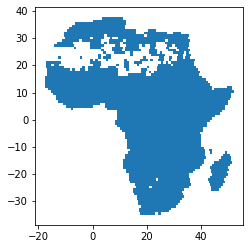

In [33]:
grid_raster_merge.plot()